In [1]:
import pandas as pd
import numpy as np

### load data

In [2]:
df = pd.read_csv('/Users/chenjiqing/Public/bladder cancer/ML used/AllBC_Nolimit10year.csv')
df

,Age,Sex,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,...,CD4,CD8,Bcell,NLR,SurgToBlood,survreftmd,Death,OutcomeTime,Outcome,SurgToBlood_std
0,69,male,Grade 3 + 4,no,ever-smoker,With Immuno,2.500,0.0,3.1,1.6,...,2.5,3.6,3.1,4.730496,757.0,53.322382,1,4.109589,1,1.145645
1,67,male,Grade 1 + 2,no,ever-smoker,Without Immuno,2.700,0.5,3.3,11.7,...,11.7,10.6,3.8,1.772586,739.0,98.299795,1,98.299795,1,1.087814
2,69,female,Grade 1 + 2,no,non-smoker,With Immuno,1.600,0.0,2.6,12.1,...,19.1,6.5,2.6,1.977346,212.0,182.833676,1,182.833676,1,-0.605357
3,63,male,Grade 1 + 2,no,ever-smoker,Without Immuno,0.600,0.0,3.6,18.7,...,19.1,14.4,3.6,1.359413,650.0,127.211499,1,28.043836,1,0.801870
4,61,male,Grade 1 + 2,no,ever-smoker,Without Immuno,4.484,0.8,7.0,11.4,...,12.7,2.9,7.8,2.045113,571.0,58.546201,1,58.546201,1,0.548055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,61,male,Grade 1 + 2,no,ever-smoker,Without Immuno,1.200,0.0,2.1,5.6,...,9.1,3.4,2.1,3.704545,134.0,133.000000,0,133.000000,0,-0.855959
676,60,female,Grade 1 + 2,no,non-smoker,Without Immuno,2.200,2.6,6.8,20.8,...,26.3,4.6,9.4,1.087264,815.0,142.000000,0,4.800000,1,1.331990
677,50,male,Grade 1 + 2,no,non-smoker,Without Immuno,2.300,0.3,9.6,8.8,...,12.1,3.9,9.9,2.027682,78.0,130.000000,0,130.000000,0,-1.035878
678,67,male,Grade 3 + 4,no,ever-smoker,Without Immuno,3.300,0.0,5.2,11.3,...,14.9,3.0,5.2,2.202206,381.0,180.172485,1,180.172485,1,-0.062386


In [3]:
df.columns

Index(['Age', 'Sex', 'TumorGrade', 'MuscleInvasive', 'SmokingStat', 'BCGtrt',
       'Bas', 'Bmem', 'Bnv', 'CD4mem', 'CD4nv', 'CD8mem', 'CD8nv', 'Eos',
       'Mono', 'Neu', 'NK', 'Treg', 'CD4', 'CD8', 'Bcell', 'NLR',
       'SurgToBlood', 'survreftmd', 'Death', 'OutcomeTime', 'Outcome',
       'SurgToBlood_std'],
      dtype='object')

### remove the variables that are not used in training

In [4]:
df.drop(['CD4', 'CD8', 'Bcell','NLR','survreftmd', 'Death', 'OutcomeTime','SurgToBlood_std'],axis=1,inplace=True)
df.columns

Index(['Age', 'Sex', 'TumorGrade', 'MuscleInvasive', 'SmokingStat', 'BCGtrt',
       'Bas', 'Bmem', 'Bnv', 'CD4mem', 'CD4nv', 'CD8mem', 'CD8nv', 'Eos',
       'Mono', 'Neu', 'NK', 'Treg', 'SurgToBlood', 'Outcome'],
      dtype='object')

In [5]:
df.dtypes

Age                 int64
Sex                object
TumorGrade         object
MuscleInvasive     object
SmokingStat        object
BCGtrt             object
Bas               float64
Bmem              float64
Bnv               float64
CD4mem            float64
CD4nv             float64
CD8mem            float64
CD8nv             float64
Eos               float64
Mono              float64
Neu               float64
NK                float64
Treg              float64
SurgToBlood       float64
Outcome             int64
dtype: object

### Although it is ok to have whitespace in the value in 'grade2', and 'ImmunoTx'for XGBoost and classification, we can't have any whitespace if we want to draw a tree.

In [6]:
df.replace(' ','_',regex=True, inplace=True)
df.head()

,Age,Sex,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,SurgToBlood,Outcome
0,69,male,Grade_3_+_4,no,ever-smoker,With_Immuno,2.500,0.0,3.1,1.6,0.90,3.3,0.3,4.568,11.2,66.7,4.9,0.0,757.0,1
1,67,male,Grade_1_+_2,no,ever-smoker,Without_Immuno,2.700,0.5,3.3,11.7,0.01,10.3,0.3,0.700,7.4,56.9,6.0,0.0,739.0,1
2,69,female,Grade_1_+_2,no,non-smoker,With_Immuno,1.600,0.0,2.6,12.1,7.00,5.5,1.0,1.000,5.2,61.1,2.7,0.0,212.0,1
3,63,male,Grade_1_+_2,no,ever-smoker,Without_Immuno,0.600,0.0,3.6,18.7,0.40,13.4,1.0,0.000,2.1,55.6,3.8,0.0,650.0,1
4,61,male,Grade_1_+_2,no,ever-smoker,Without_Immuno,4.484,0.8,7.0,11.4,1.30,1.2,1.7,3.400,11.5,54.4,2.3,0.9,571.0,1


### The columns of data that we will use to make classifications

In [7]:
X = df.drop('Outcome',axis=1).copy()
X.head()

,Age,Sex,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,SurgToBlood
0,69,male,Grade_3_+_4,no,ever-smoker,With_Immuno,2.500,0.0,3.1,1.6,0.90,3.3,0.3,4.568,11.2,66.7,4.9,0.0,757.0
1,67,male,Grade_1_+_2,no,ever-smoker,Without_Immuno,2.700,0.5,3.3,11.7,0.01,10.3,0.3,0.700,7.4,56.9,6.0,0.0,739.0
2,69,female,Grade_1_+_2,no,non-smoker,With_Immuno,1.600,0.0,2.6,12.1,7.00,5.5,1.0,1.000,5.2,61.1,2.7,0.0,212.0
3,63,male,Grade_1_+_2,no,ever-smoker,Without_Immuno,0.600,0.0,3.6,18.7,0.40,13.4,1.0,0.000,2.1,55.6,3.8,0.0,650.0
4,61,male,Grade_1_+_2,no,ever-smoker,Without_Immuno,4.484,0.8,7.0,11.4,1.30,1.2,1.7,3.400,11.5,54.4,2.3,0.9,571.0


### Turn categorical variable into continuous variables for XGBoost requirement

In [8]:
X2 = X.assign(Sex = np.where(X['Sex']=='male',0,1),
             TumorGrade = np.where(X['TumorGrade']=='Grade_1_+_2',0,1),
             MuscleInvasive = np.where(X['MuscleInvasive']=='no',0,1),
             SmokingStat = np.where(X['SmokingStat']=='non-smoker',0,1),
             BCGtrt = np.where(X['BCGtrt']=='Without_Immuno',0,1)).copy()
X2.head()

,Age,Sex,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,SurgToBlood
0,69,0,1,0,1,1,2.500,0.0,3.1,1.6,0.90,3.3,0.3,4.568,11.2,66.7,4.9,0.0,757.0
1,67,0,0,0,1,0,2.700,0.5,3.3,11.7,0.01,10.3,0.3,0.700,7.4,56.9,6.0,0.0,739.0
2,69,1,0,0,0,1,1.600,0.0,2.6,12.1,7.00,5.5,1.0,1.000,5.2,61.1,2.7,0.0,212.0
3,63,0,0,0,1,0,0.600,0.0,3.6,18.7,0.40,13.4,1.0,0.000,2.1,55.6,3.8,0.0,650.0
4,61,0,0,0,1,0,4.484,0.8,7.0,11.4,1.30,1.2,1.7,3.400,11.5,54.4,2.3,0.9,571.0


In [9]:
X2.dtypes

Age                 int64
Sex                 int64
TumorGrade          int64
MuscleInvasive      int64
SmokingStat         int64
BCGtrt              int64
Bas               float64
Bmem              float64
Bnv               float64
CD4mem            float64
CD4nv             float64
CD8mem            float64
CD8nv             float64
Eos               float64
Mono              float64
Neu               float64
NK                float64
Treg              float64
SurgToBlood       float64
dtype: object

In [10]:
X2.describe()

,Age,Sex,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,SurgToBlood
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,673.000000
mean,63.389706,0.245588,0.316176,0.113235,0.825000,0.133824,1.752906,0.403512,3.408824,9.941124,2.873912,4.422688,1.865279,0.530812,6.513382,62.928729,3.752041,0.262206,400.417533
std,9.618628,0.430752,0.465325,0.317113,0.380247,0.340713,1.052430,0.713902,2.106749,6.453878,2.410099,3.844873,1.683541,1.001056,3.064253,11.926356,2.060434,0.509813,311.250377
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,34.874000,0.000000,0.000000,-78.000000
25%,58.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.100000,0.000000,1.900000,5.100000,1.000000,1.600000,0.500000,0.000000,4.400000,55.800000,2.200000,0.000000,166.000000
50%,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.700000,0.000000,3.100000,9.050000,2.300000,3.200000,1.450000,0.000000,6.500000,63.200000,3.400000,0.000000,311.000000
75%,71.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.400000,0.600000,4.600000,13.200000,4.100000,6.500000,2.800000,0.700000,8.500000,71.500000,4.900000,0.300000,544.000000
max,79.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.484000,2.942000,9.600000,27.426000,10.200000,15.352000,6.500000,4.568000,14.000000,94.100000,9.742000,2.000000,1790.000000


In [11]:
print(X2.isnull().sum())

Age               0
Sex               0
TumorGrade        0
MuscleInvasive    0
SmokingStat       0
BCGtrt            0
Bas               0
Bmem              0
Bnv               0
CD4mem            0
CD4nv             0
CD8mem            0
CD8nv             0
Eos               0
Mono              0
Neu               0
NK                0
Treg              0
SurgToBlood       7
dtype: int64


## Some missing values in 'SurgToBlood'. Using RandomForest to fit missing values

In [12]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_BD(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    BD_df = df[['SurgToBlood','Age', 'Bas', 'Bmem', 'Bnv', 
                'CD4mem', 'CD4nv', 'CD8mem',
                'CD8nv', 'Mono', 'Neu', 'NK','Treg']]

    # NMIBC patients 分成已知 BD time和未知 BD time 两部分
    known_BD = BD_df[BD_df.SurgToBlood.notnull()].values
    unknown_BD = BD_df[BD_df.SurgToBlood.isnull()].values

    # y即目标 BD time
    y = known_BD[:, 0]

    # X即特征属性值
    X = known_BD[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedBD = rfr.predict(unknown_BD[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.SurgToBlood.isnull()), 'SurgToBlood' ] = predictedBD 

    return df, rfr

X3, rfr = set_missing_BD(X2)

### The column of data that we want to predict.

In [13]:
#y = df.assign(RecOrProg = np.where(df['RecOrProg']=='yes',1,0))['RecOrProg'].copy()
y = df['Outcome'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

### Now we simply split the data into training and testing sets and build the model. However, first, let's observe that this data is imbalanced by dividing the number of people who has tumor recurrence or progression, where y =1, by the total number of people in the dataset.

In [14]:
sum(y)/len(y)

0.775

### 30% of the NMIBC patients in the dataset have deceased within 10 year. We can split using stratification in order to maintain tha same percentage of NmIBC patients who have tumor recurrence or progression in both the training set and the testing set.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3,y,random_state=40,stratify = y,test_size=0.2)

In [17]:
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.7757352941176471
0.7720588235294118


In [18]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [19]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',missing=None,seed=40)
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.66744
[1]	validation_0-auc:0.67895
[2]	validation_0-auc:0.72212
[3]	validation_0-auc:0.74393
[4]	validation_0-auc:0.72688
[5]	validation_0-auc:0.72074
[6]	validation_0-auc:0.72980
[7]	validation_0-auc:0.73641
[8]	validation_0-auc:0.75238
[9]	validation_0-auc:0.75545
[10]	validation_0-auc:0.75975
[11]	validation_0-auc:0.76344
[12]	validation_0-auc:0.76774
[13]	validation_0-auc:0.75668
[14]	validation_0-auc:0.74624
[15]	validation_0-auc:0.75975


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16]	validation_0-auc:0.75638
[17]	validation_0-auc:0.75484
[18]	validation_0-auc:0.75668
[19]	validation_0-auc:0.76313
[20]	validation_0-auc:0.75791
[21]	validation_0-auc:0.75853
[22]	validation_0-auc:0.76651


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=40,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### How it performms on the testing Dataset by running the Testing Dataset down the model and drawing a Confusion Matrix

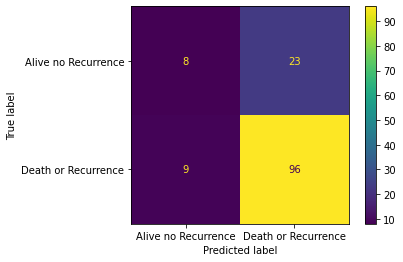

In [22]:
plot_confusion_matrix(clf_xgb,
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive no Recurrence','Death or Recurrence'])

### 31 Bladder cancer patients who alived and no tumor recurrence, 8 (26%) were correctly classified. And of the 105 Bladder cancer patients that deceased or having tumor recurrence, 96 (91%) were correctly classified. So the XGBoost model was not awesomme. Part of the problem is that our data is imbalanced. We care about predicting who will die or recurrence, we would like to capture mmore of the NMIBC patients that deceased. XGBoost has a parameter, scale_pos_weight, that helps with imbalanced data.

# Optimize Parameters using Cross Validation and GridSearch()

In [23]:
# Round 1
param_grid = {
    'max_depth':[3,4,5,6,7],
    'learning_rate':[0.1,0.05,0.01,0.005,0.001],
    'gamma':[0,0.1,0.3,0.5,0.7],
    'reg_lambda':[0,0.5,1.0,5.0,10],
    'scale_pos_weight':[1,3,5,7,9]
}

## To speed up cross validation, and to further prevent overfitting. We are only using a random subset of the data (90%) and are only using a random subset of the features (columns) (50%) per tree.

In [24]:
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 40,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params.fit(X_train,
            y_train,
            verbose = False,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])
print(optimal_params.best_params_)

{'gamma': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 5.0, 'scale_pos_weight': 9}


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### first round: {'gamma': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 5.0, 'scale_pos_weight': 9}

In [27]:
# Round 2
param_grid2 = {
    'max_depth':[2,3,4],
    'learning_rate':[0.09,0.1,0.13],
    'gamma':[0.55,0.6,0.65],
    'reg_lambda':[5,6,7,8],
    'scale_pos_weight':[3,8,9,10]
}

In [28]:
optimal_params2 = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 40,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid2,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params2.fit(X_train,
            y_train,
            verbose = False,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])
print(optimal_params2.best_params_)
print(optimal_params2.best_score_)

{'gamma': 0.55, 'learning_rate': 0.1, 'max_depth': 2, 'reg_lambda': 7, 'scale_pos_weight': 9}
0.7248095238095237


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### second round: {'gamma': 0.55, 'learning_rate': 0.1, 'max_depth': 2, 'reg_lambda': 7, 'scale_pos_weight': 9}

# Building, Evaluating, Drawing, and interpreting the optimal XGBoost model

In [51]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=40,
                            gamma=0.55, learning_rate = 0.1, max_depth = 2,
                            reg_lambda=7, scale_pos_weight =0.4)
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.69954
[1]	validation_0-auc:0.70753
[2]	validation_0-auc:0.69416
[3]	validation_0-auc:0.69232
[4]	validation_0-auc:0.69770
[5]	validation_0-auc:0.70599
[6]	validation_0-auc:0.70922
[7]	validation_0-auc:0.70737
[8]	validation_0-auc:0.69432
[9]	validation_0-auc:0.69462
[10]	validation_0-auc:0.69201
[11]	validation_0-auc:0.70123
[12]	validation_0-auc:0.70461
[13]	validation_0-auc:0.71183
[14]	validation_0-auc:0.71213
[15]	validation_0-auc:0.70937
[16]	validation_0-auc:0.71521
[17]	validation_0-auc:0.71874
[18]	validation_0-auc:0.72719
[19]	validation_0-auc:0.72627
[20]	validation_0-auc:0.72535
[21]	validation_0-auc:0.72381
[22]	validation_0-auc:0.72565
[23]	validation_0-auc:0.73042
[24]	validation_0-auc:0.73472
[25]	validation_0-auc:0.73487
[26]	validation_0-auc:0.73794
[27]	validation_0-auc:0.73518
[28]	validation_0-auc:0.73763
[29]	validation_0-auc:0.74255
[30]	validation_0-auc:0.74194
[31]	validation_0-auc:0.74562
[32]	validation_0-auc:0.74900
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.55, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=7, scale_pos_weight=0.4, seed=40,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [52]:
clf_xgb.best_ntree_limit

62

## Refit the classifier with the number of trees from the best round.

In [53]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=40,
                            gamma=0.55, learning_rate = 0.1, max_depth = 2,
                            reg_lambda=7, scale_pos_weight =0.4,n_estimators=62)
clf_xgb.fit(X_train,
            y_train)

[16:50:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.55, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=62, n_jobs=4, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=7, scale_pos_weight=0.4, seed=40,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
y_pred = clf_xgb.predict_proba(X_test)[:, 1]
roc_auc_score(y_test,y_pred)

0.7686635944700461

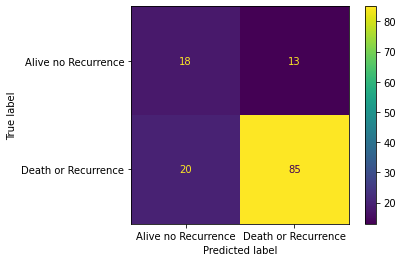

In [55]:
plot_confusion_matrix(clf_xgb,
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive no Recurrence','Death or Recurrence'])

### 31 Bladder cancer patients who alived and no tumor recurrence, 18 (58%) were correctly classified. And of the 105 Bladder cancer patients that deceased or having tumor recurrence, 85 (81%) were correctly classified. So the XGBoost model was not awesomme. Part of the problem is that our data is imbalanced. We care about predicting who will die or recurrence, we would like to capture mmore of the NMIBC patients that deceased. XGBoost has a parameter, scale_pos_weight, that helps with imbalanced data.

In [56]:
clf_xgb.feature_importances_

array([0.18678382, 0.        , 0.06215424, 0.        , 0.04987513,
       0.        , 0.05209138, 0.04979254, 0.03360755, 0.03352892,
       0.08295725, 0.08759874, 0.06595252, 0.        , 0.04530842,
       0.07143817, 0.05840797, 0.05068032, 0.06982303], dtype=float32)

In [57]:
clf_xgb.importance_type

'gain'

In [58]:
clf_xgb.score(X_test, y_test)

0.7573529411764706

## Explain the model's predictions on the entire dataset

In [69]:
import shap
explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_train)

## SHAP Summary Plot

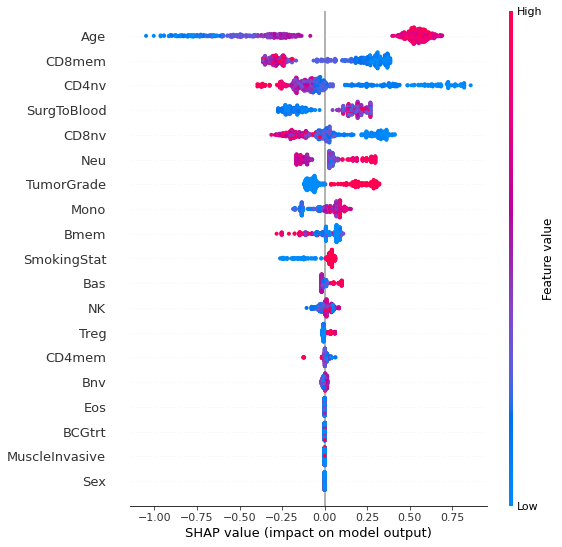

In [70]:
shap.summary_plot(shap_values, X_train)

## SHAP Dependence Plots

In [85]:
X_train2 = X_train.assign(Sex = np.where(X_train['Sex']==0,'male','female'),
             TumorGrade = np.where(X_train['TumorGrade']==0,'Grade 1+2','Grade 3+4'),
             MuscleInvasive = np.where(X_train['MuscleInvasive']==0,'NMIBC','MIBC'),
             SmokingStat = np.where(X_train['SmokingStat']==0,'non-smoker','ever-smoker'),
             BCGtrt = np.where(X_train['BCGtrt']==0,'Without BCG','With BCG')).copy()
X_train2.head(11)

,Age,Sex,TumorGrade,MuscleInvasive,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Eos,Mono,Neu,NK,Treg,SurgToBlood
537,66,male,Grade 3+4,MIBC,ever-smoker,Without BCG,0.0,0.1,0.6,9.7,5.70,1.5,2.00,0.0,7.8,69.000,0.9,0.0,381.0
305,55,male,Grade 1+2,NMIBC,ever-smoker,Without BCG,2.9,1.9,3.0,11.8,0.01,15.1,0.01,1.1,6.2,51.900,4.6,1.4,484.0
470,71,male,Grade 1+2,NMIBC,ever-smoker,With BCG,1.6,0.6,4.1,12.8,1.00,7.0,1.30,0.0,4.3,57.900,5.4,1.1,218.0
480,73,male,Grade 1+2,NMIBC,non-smoker,With BCG,2.3,0.1,2.3,12.5,1.60,2.6,2.40,0.0,5.6,62.800,5.8,0.5,237.0
405,63,male,Grade 1+2,NMIBC,ever-smoker,Without BCG,0.0,2.1,1.9,10.6,5.00,5.0,2.00,0.0,9.8,60.000,2.0,0.0,215.0
603,70,male,Grade 1+2,NMIBC,ever-smoker,Without BCG,0.3,0.0,2.7,9.3,3.30,1.6,2.90,0.0,4.3,70.700,3.7,0.0,747.0
650,45,female,Grade 1+2,NMIBC,ever-smoker,Without BCG,0.5,0.1,4.3,14.3,5.20,2.2,1.40,0.0,4.7,62.900,3.0,0.0,1628.0
465,53,male,Grade 3+4,NMIBC,ever-smoker,With BCG,2.8,0.7,9.6,10.6,2.80,3.5,1.80,0.0,6.0,55.600,2.8,0.8,263.0
72,62,male,Grade 1+2,NMIBC,ever-smoker,Without BCG,0.9,1.5,6.5,25.5,10.20,0.0,3.00,1.9,4.8,35.400,8.3,0.2,285.0
503,70,female,Grade 1+2,NMIBC,ever-smoker,Without BCG,0.5,0.0,1.7,7.8,2.60,5.0,1.10,0.0,8.1,67.700,3.1,0.1,289.0


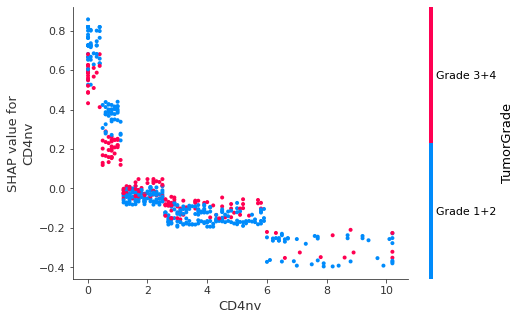

In [81]:
shap.dependence_plot("CD4nv", shap_values, X_train,interaction_index="TumorGrade",display_features=X_train2)

## Local interpretability

In [90]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10,:], X_train2.iloc[10,:])

## Aggregated force_plot

In [91]:
shap.force_plot(explainer.expected_value, shap_values, X_train2)